In [1]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib
import seaborn
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [2]:
!pip install pdpbox scikit-learn==0.23.1 xgboost==1.3.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Install python library for SHAP explainer toolbox
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
path = '/content/ToyotaCorolla.csv'

In [8]:
df = pd.read_csv(path)

In [9]:
df.head(2)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [11]:
df_x = df[['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']]
df_y = df[['Price']]

In [12]:
X_train, X_val, Y_train, Y_val = train_test_split(df_x, df_y, test_size = 0.3, random_state = 5)

In [14]:
from xgboost import XGBRegressor

gbr_model = XGBRegressor()
gbr_model.fit(X_train, Y_train)

# Predict
Y_val_predict = gbr_model.predict(X_val)

# Evaluate
error_val = np.sqrt(mean_squared_error(Y_val_predict, Y_val))
print('Validation Root Mean Squared Error (Gradient Boosting): ' + str(error_val))

Validation Root Mean Squared Error (Gradient Boosting): 1159.640330305863


**Partial Dependence Plots**

In [15]:
from pdpbox import pdp
def plot_pdp(model, df, feature, cluster_flag=False, nb_clusters=None, lines_flag=False):
    
    # Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=model, dataset=df, model_features=df.columns.tolist(), feature=feature)

    # plot it
    pdp.pdp_plot(pdp_goals, feature, cluster=cluster_flag, n_cluster_centers=nb_clusters, plot_lines=lines_flag)

You selected Age_08_04


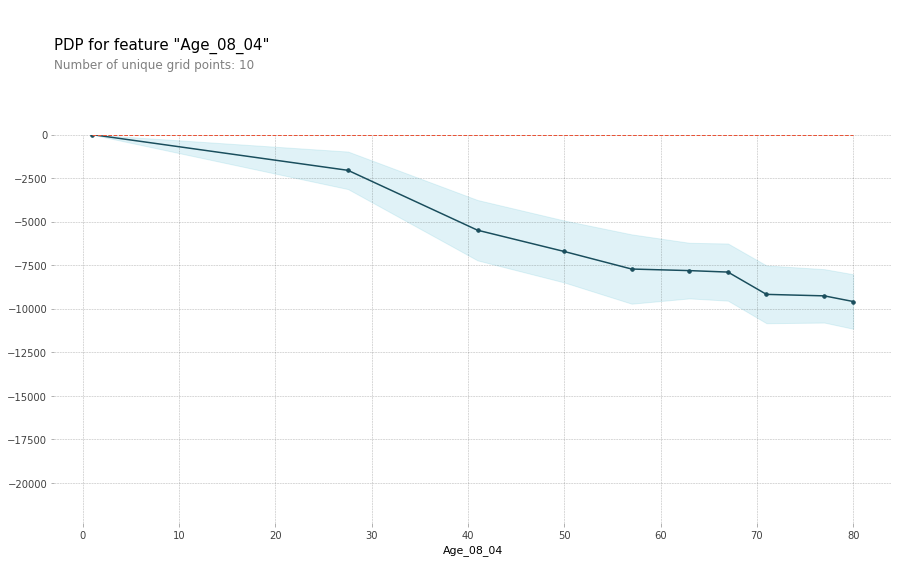

In [16]:
#@title Select a predictor to analyse Gradient Boosting Model. { run: "auto" }

selected_predictor = "Age_08_04" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
print('You selected', selected_predictor)
plot_pdp(gbr_model, X_train, selected_predictor)

You selected HP


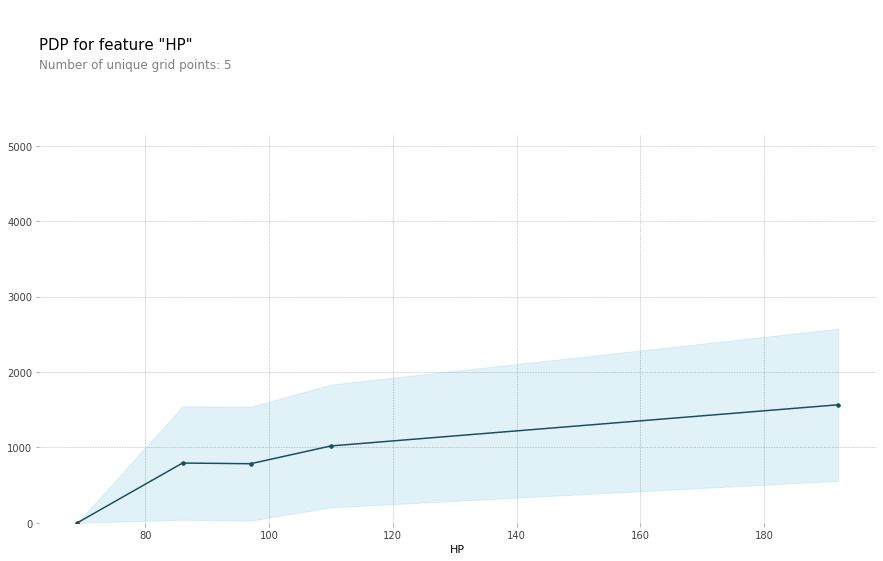

In [17]:
#@title Select a predictor to analyse Gradient Boosting Model. { run: "auto" }

selected_predictor = "HP" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
print('You selected', selected_predictor)
plot_pdp(gbr_model, X_train, selected_predictor)

You selected KM


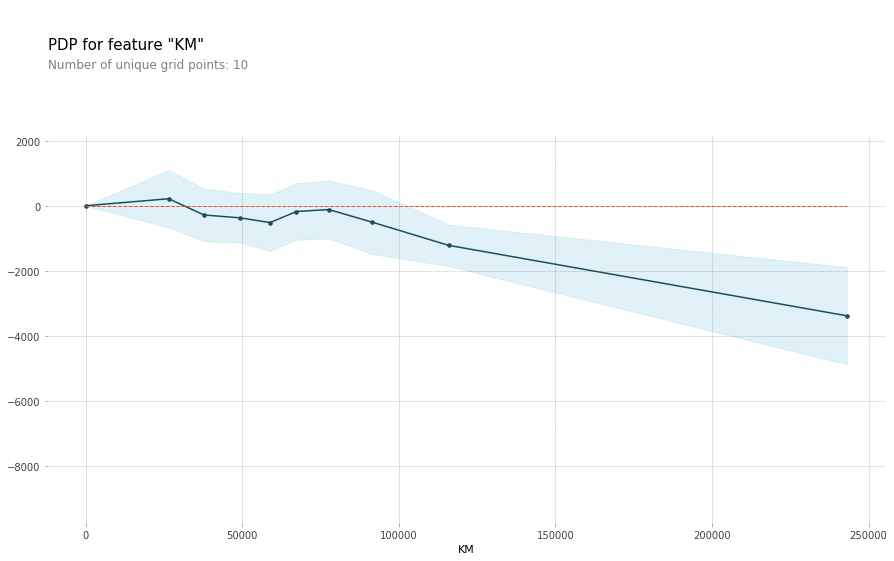

In [18]:
#@title Select a predictor to analyse Gradient Boosting Model. { run: "auto" }

selected_predictor = "KM" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
print('You selected', selected_predictor)
plot_pdp(gbr_model, X_train, selected_predictor)

**ICE Plots**

You selected Age_08_04 with 15 clusters.


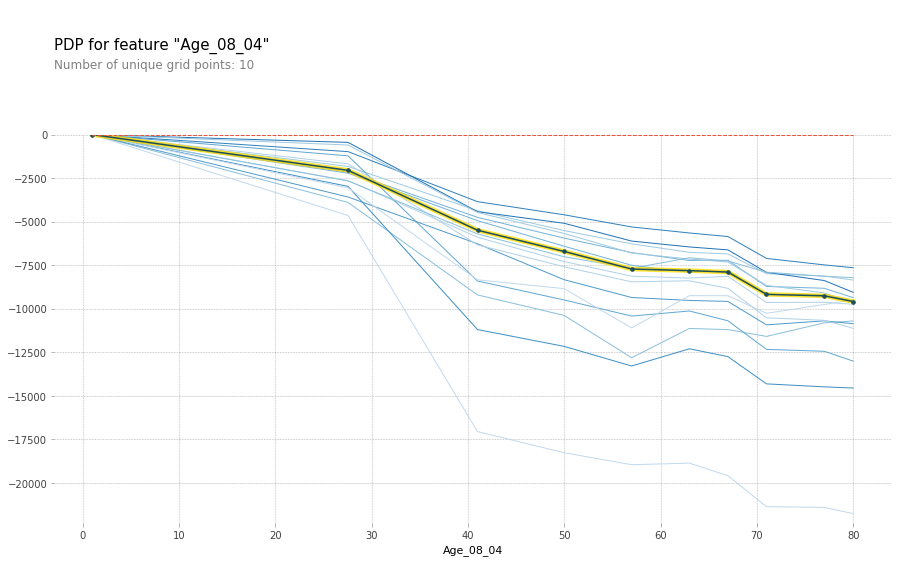

In [19]:
#@title Select a predictor to analyse Gradient Boosting Model. { run: "auto" }

selected_predictor = "Age_08_04" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
number_clusters = 15 #@param {type:"slider", min:1, max:50, step:1}
print('You selected {} with {} clusters.'.format(selected_predictor, number_clusters))
plot_pdp(gbr_model, X_train, selected_predictor, cluster_flag=True, nb_clusters=number_clusters, lines_flag=True)

You selected HP with 15 clusters.


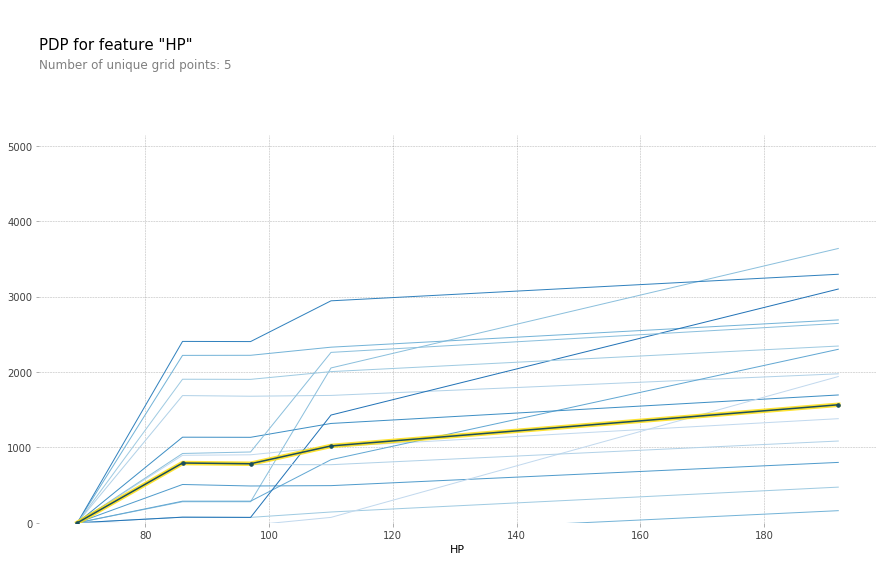

In [20]:
#@title Select a predictor to analyse Gradient Boosting Model. { run: "auto" }

selected_predictor = "HP" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
number_clusters = 15 #@param {type:"slider", min:1, max:50, step:1}
print('You selected {} with {} clusters.'.format(selected_predictor, number_clusters))
plot_pdp(gbr_model, X_train, selected_predictor, cluster_flag=True, nb_clusters=number_clusters, lines_flag=True)

You selected KM with 15 clusters.


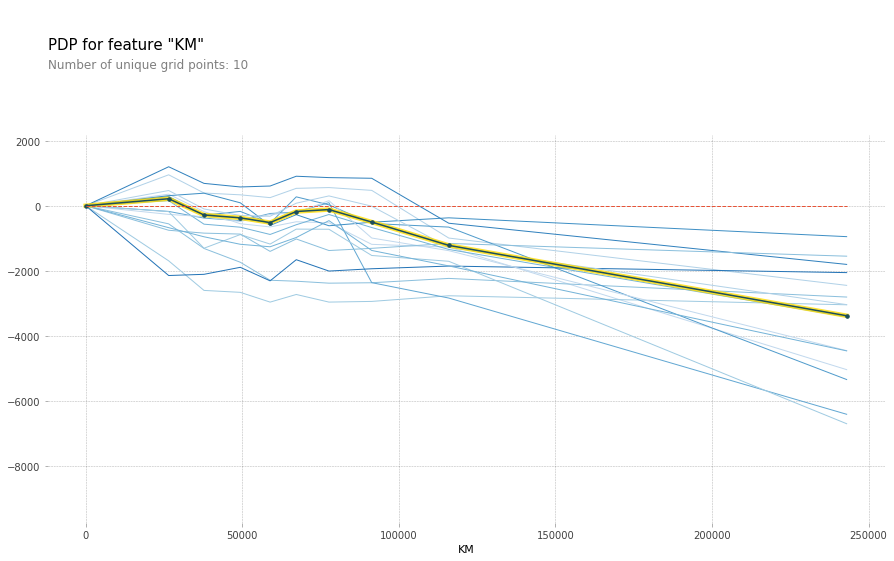

In [21]:
#@title Select a predictor to analyse Gradient Boosting Model. { run: "auto" }

selected_predictor = "KM" #@param ['Age_08_04', 'KM', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Weight']
number_clusters = 15 #@param {type:"slider", min:1, max:50, step:1}
print('You selected {} with {} clusters.'.format(selected_predictor, number_clusters))
plot_pdp(gbr_model, X_train, selected_predictor, cluster_flag=True, nb_clusters=number_clusters, lines_flag=True)

**SHAP Explainer**

In [24]:
import shap

In [25]:
explainer = shap.TreeExplainer(gbr_model)
shap_values = explainer.shap_values(X_train)

In [26]:
record_id = 73

print('Actual values:')
print(X_train.iloc[record_id,:])

# Looks like Google Colab needs shap.initjs() in every cell where there is a visualization.
shap.initjs()

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[record_id,:], X_train.iloc[record_id,:])
     

Actual values:
Age_08_04       42
KM           61300
HP              97
Met_Color        1
Automatic        0
cc            1400
Doors            3
Weight        1030
Name: 232, dtype: int64


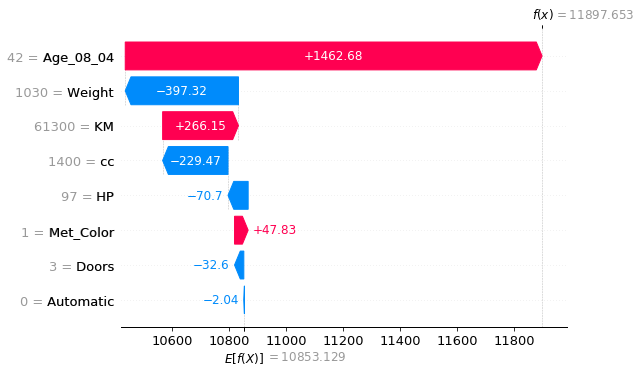

In [27]:
# visualize the prediction of given record id
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[record_id], features = X_train.iloc[record_id,:])

In [28]:
# Looks like Google Colab needs shap.initjs() in every cell where there is a visualization.
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train)
     

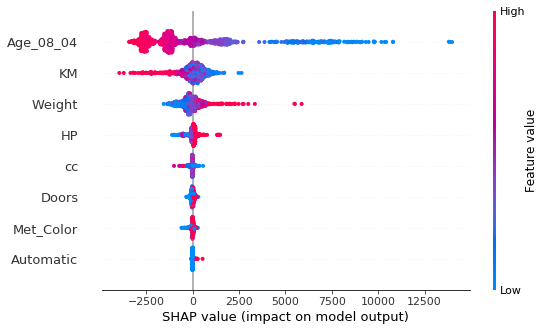

In [29]:
# summarize the effects of all the features
shap.initjs()
shap.summary_plot(shap_values, X_train)
     

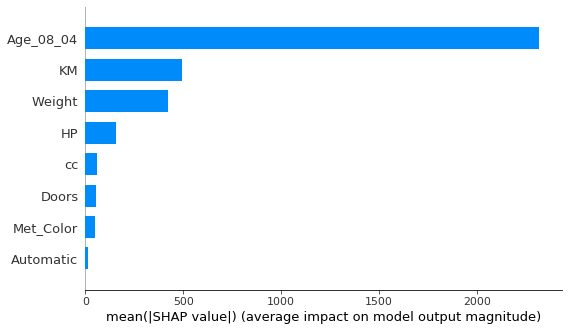

In [30]:
shap.initjs()
shap.summary_plot(shap_values, X_train, plot_type="bar")